In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# show plot in Jupyter cell 
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  set figure size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

# Zero Padding

In [12]:
def zero_pad(X, pad):
    '''
    X is image (or tensor) which have shape (n_m, n_h, n_w, n_c)
    n_m: batch_size m
    n_h: image height
    n_w: image width
    n_c: image channel
    pad: int, how many padding to padding
    return: X after zero padding which have shape (n_m, n_h+2*pad, n_w+2*pad, n_c)
    '''
    pad = int(pad)
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
    return X_pad

x_shape: (4, 5, 5, 3)
x_pad_shape: (4, 9, 9, 3)
one of x:
 [[ 37  72 133 144  71]
 [134  20 146 252 157]
 [ 68 233 222 141   7]
 [ 22 128   8 115 121]
 [ 71 149   3 241  26]]
one of x_pad:
 [[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0  37  72 133 144  71   0   0]
 [  0   0 134  20 146 252 157   0   0]
 [  0   0  68 233 222 141   7   0   0]
 [  0   0  22 128   8 115 121   0   0]
 [  0   0  71 149   3 241  26   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]
one of x:
 [[235 137  79 129 237]
 [ 25 254 212 234 142]
 [215 241  96 233  63]
 [ 57  60 216 175 200]
 [131  49 196  43  52]]
one of x_pad:
 [[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0 235 137  79 129 237   0   0]
 [  0   0  25 254 212 234 142   0   0]
 [  0   0 215 241  96 233  63   0   0]
 [  0   0  57  60 216 175 200   0   0]
 [  0   0 131  49 196  43  52   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  

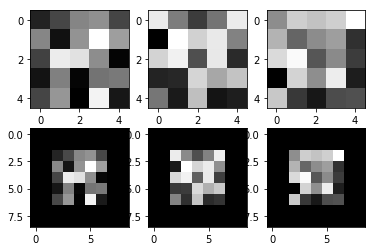

In [35]:
np.random.seed(1)

x = np.random.randint(0, 255, (4, 5, 5, 3))
x_pad = zero_pad(x, pad=2)
print('x_shape:', x.shape)
print('x_pad_shape:', x_pad.shape)
fig = plt.figure()
for i in range(0, 6):
    ax = fig.add_subplot(2, 3, i+1)
   
    if i < 3:
        print('one of x:\n', x[0, :, :, i])
        print('one of x_pad:\n', x_pad[0, :, :, i])
        ax.imshow(x[0, :, :, i])
    else:
        ax.imshow(x_pad[0, :, :, i-3])

## Pooling_Forward

In [37]:
def pooling_forward(X, hp={'stride':1, 'kernel':0}, mode='max'):
    '''
    X: input image or tensor
    hp: dict, hyperparameter using 'stride' and 'pad' as keys and corresponding values
    mode:str 'max' or 'average'
    return a pooling image X_pool
    '''
    # input image shape
    (m, n_h, n_w, n_c) = X.shape
    
    #collect hps
    kernel_size, stride = hp['kernel'], hp['stride']
    
    #output dimensio
    n_h_new = int((n_h - kernel_size) // stride + 1)
    n_w_new = int((n_w - kernel_size) // stride + 1)
    n_c_new = n_c
    
    #initial output image
    X_pool = np.zeros((m, n_h_new, n_w_new, n_c_new))
    
    #sliding window : for loop
    for m_ in range(0, m):
        for h in range(0, n_h_new):
            for w in range(0, n_w_new):
                for c in range(0, n_c_new):
                    X_slice = X[m_, h*stride:(h*stride+kernel_size), w*stride:(w*stride+kernel_size), c]
                    if mode == 'max':
                        X_pool[m_, h, w, c] = np.max(X_slice)
                    elif mode == 'avg':
                        X_pool[m_, h, w, c] = np.mean(X_slice)
                    else:
                        print('mode: {} is not support'.formate(mode))
                        return None
    #save input feature map (image) and hyperparameters for pooling backward
    cache = (X, hp)
    
    assert(X_pool.shape == (m, n_h_new, n_w_new, n_c_new))
    
    return X_pool
                        
    

x_shape: (4, 5, 5, 3)
x_pad_shape: (4, 3, 3, 3)
one of x:
 [[ 37  72 133 144  71]
 [134  20 146 252 157]
 [ 68 233 222 141   7]
 [ 22 128   8 115 121]
 [ 71 149   3 241  26]]
one of x_pool:
 [[233. 252. 252.]
 [233. 252. 252.]
 [233. 241. 241.]]
one of x:
 [[235 137  79 129 237]
 [ 25 254 212 234 142]
 [215 241  96 233  63]
 [ 57  60 216 175 200]
 [131  49 196  43  52]]
one of x_pool:
 [[254. 254. 237.]
 [254. 254. 234.]
 [241. 241. 233.]]
one of x:
 [[140 203 192 204 252]
 [178 101 139 156  50]
 [215 247  86 137  61]
 [  1 209 141 234  30]
 [198  57  24  76  80]]
one of x_pool:
 [[247. 247. 252.]
 [247. 247. 234.]
 [247. 247. 234.]]


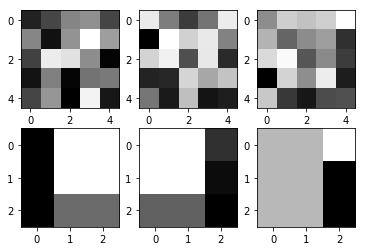

In [40]:
np.random.seed(1)

x = np.random.randint(0, 255, (4, 5, 5, 3))
x_pool = pooling_forward(x, hp={'stride':1, 'kernel':3}, mode='max')
print('x_shape:', x.shape)
print('x_pad_shape:', x_pool.shape)

fig = plt.figure()
for i in range(0, 6):
    ax = fig.add_subplot(2, 3, i+1)
   
    if i < 3:
        print('one of x:\n', x[0, :, :, i])
        print('one of x_pool:\n', x_pool[0, :, :, i])
        ax.imshow(x[0, :, :, i])
    else:
        ax.imshow(x_pool[0, :, :, i-3])
